In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
dataFrame = pd.read_excel("merc.xlsx") #Veriyi çekme işlemi

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe() #Veri hakkında detaylı bilgi 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum() #Toplam null değeri gösterme işlemi

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\emirh\AppData\Local\Temp\ipykernel_4108\2725949131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"]) #price göre veri dağılımı


<Axes: xlabel='price', ylabel='Density'>

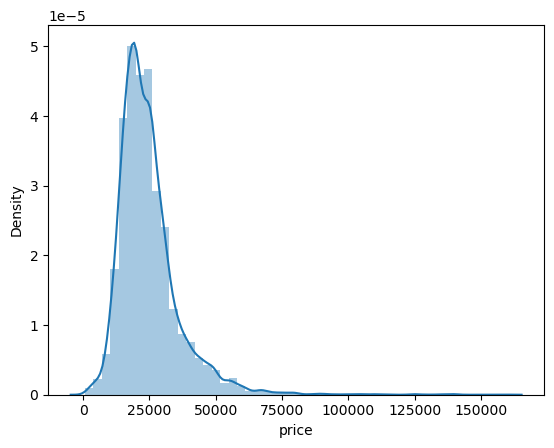

In [6]:
sbn.distplot(dataFrame["price"]) #price göre veri dağılımı

<Axes: ylabel='count'>

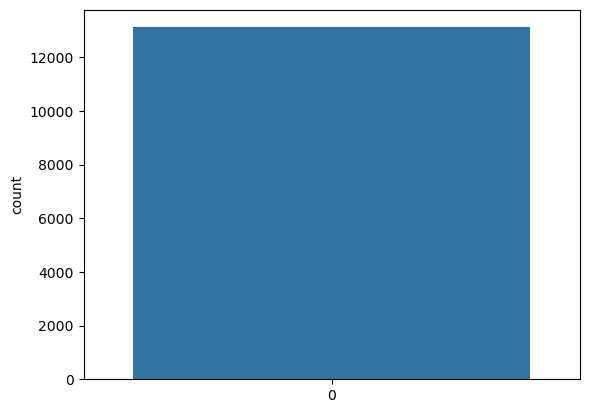

In [7]:
sbn.countplot(dataFrame["year"] )

In [8]:
dataFrame[["year","price","mileage","tax","mpg","engineSize"]].corr() # Verinin lolonları arasındaki ilişki

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame[["year","price","mileage","tax","mpg","engineSize"]].corr()["price"].sort_values() #price verisine göre diğer verilerin etkileyiş biçimi

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

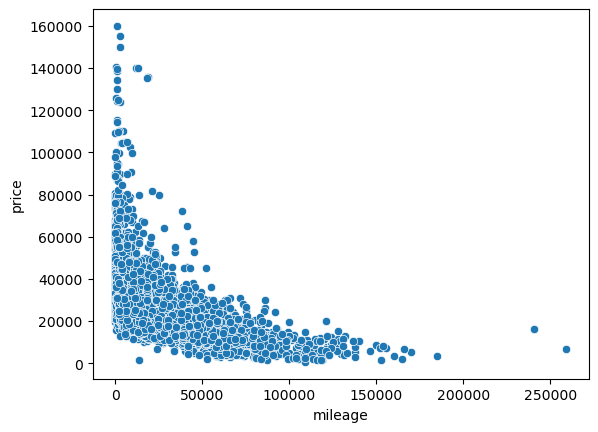

In [10]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame) #verilerin grafiksel olarak ilişkileri

In [11]:
dataFrame.sort_values("price",ascending=False).head(20) #asc = false ile büyükten küçüğe sıralama yaptık

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
dataFrame.sort_values("price",ascending=True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [13]:
len(dataFrame)

13119

In [14]:
len(dataFrame) * 0.01 #verinin %1 lik kısmı belirlendi

131.19

In [15]:
yuzdeDoksanDokuzDF = dataFrame.sort_values("price",ascending=False).iloc[131:] #Buradaki işlem sayesinde 131 yüksek değeri atlayarak aldık.

In [16]:
yuzdeDoksanDokuzDF

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [17]:
yuzdeDoksanDokuzDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\emirh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


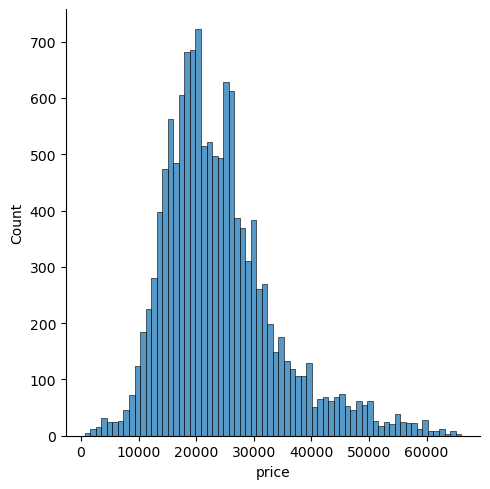

In [18]:
sbn.displot(yuzdeDoksanDokuzDF["price"])

In [19]:
dataFrame[["year","price","mileage","tax","mpg","engineSize"]].groupby("year").mean()["price"] #Veriyi yıla göre grupladık ve fiiyatın ortalamasını aldık

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
yuzdeDoksanDokuzDF[["year","price","mileage","tax","mpg","engineSize"]].groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
dataFrame[["year","price","mileage","tax","mpg","engineSize"]][dataFrame.year != 1970 ].groupby("year").mean()["price"] #1970 değerini çıkardık

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [22]:
dataFrame = yuzdeDoksanDokuzDF

In [23]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [24]:
dataFrame = dataFrame[dataFrame.year != 1970] # Kalıcı olarak 1970 değerini çıkartma işlemi yaptık

In [25]:
dataFrame[["year","price","mileage","tax","mpg","engineSize"]].groupby("year").mean()

,price,mileage,tax,mpg,engineSize
year,,,,,
1997,9995.000000,76000.000000,255.000000,28.200000,3.200000
1998,8605.000000,76347.750000,262.500000,28.925000,3.450000
1999,5995.000000,34000.000000,145.000000,24.600000,3.200000
2000,5743.333333,89648.666667,268.333333,26.333333,3.200000
2001,4957.900000,72955.100000,347.500000,28.140000,2.870000
2002,5820.444444,57391.111111,350.555556,27.877778,3.522222
2003,4878.000000,88777.714286,300.000000,29.485714,3.028571
2004,4727.615385,94363.461538,312.307692,31.838462,2.530769
2005,4426.111111,80651.333333,303.333333,35.344444,2.377778


In [26]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [27]:
dataFrame = dataFrame.drop("transmission",axis=1) # Sayısal olamayan kolon değerini veriden çıkardık

In [28]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [29]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [30]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [31]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [37]:
len(x_train)

9090

In [38]:
len(x_test)

3897

In [47]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
x_train.shape

(9090, 5)

In [50]:
model = Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss = "mse")


In [51]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size = 250,epochs=300)

Epoch 1/300
37/37 [==============================] - 2s 11ms/step - loss: 672148032.0000 - val_loss: 688105728.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672124992.0000 - val_loss: 688063872.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 672040064.0000 - val_loss: 687898752.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671696128.0000 - val_loss: 687238976.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 670456832.0000 - val_loss: 685072640.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 666870784.0000 - val_loss: 679356224.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 658310208.0000 - val_loss: 666699776.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 640765376.0000 - val_loss: 642306688.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 608911

37/37 [==============================] - 0s 5ms/step - loss: 58999936.0000 - val_loss: 60603724.0000
Epoch 73/300
37/37 [==============================] - 0s 5ms/step - loss: 58379460.0000 - val_loss: 59946076.0000
Epoch 74/300
37/37 [==============================] - 0s 5ms/step - loss: 57733876.0000 - val_loss: 59324216.0000
Epoch 75/300
37/37 [==============================] - 0s 5ms/step - loss: 57083908.0000 - val_loss: 58654620.0000
Epoch 76/300
37/37 [==============================] - 0s 5ms/step - loss: 56434208.0000 - val_loss: 57982300.0000
Epoch 77/300
37/37 [==============================] - 0s 5ms/step - loss: 55755464.0000 - val_loss: 57308276.0000
Epoch 78/300
37/37 [==============================] - 0s 5ms/step - loss: 55062920.0000 - val_loss: 56621200.0000
Epoch 79/300
37/37 [==============================] - 0s 4ms/step - loss: 54376508.0000 - val_loss: 55913744.0000
Epoch 80/300
37/37 [==============================] - 0s 5ms/step - loss: 53664596.0000 - val_loss: 5

37/37 [==============================] - 0s 5ms/step - loss: 23100280.0000 - val_loss: 24113184.0000
Epoch 144/300
37/37 [==============================] - 0s 5ms/step - loss: 23019502.0000 - val_loss: 24031072.0000
Epoch 145/300
37/37 [==============================] - 0s 5ms/step - loss: 22913762.0000 - val_loss: 23942796.0000
Epoch 146/300
37/37 [==============================] - 0s 6ms/step - loss: 22802784.0000 - val_loss: 23869496.0000
Epoch 147/300
37/37 [==============================] - 0s 6ms/step - loss: 22692320.0000 - val_loss: 23806784.0000
Epoch 148/300
37/37 [==============================] - 0s 10ms/step - loss: 22614968.0000 - val_loss: 23698504.0000
Epoch 149/300
37/37 [==============================] - 0s 11ms/step - loss: 22532288.0000 - val_loss: 23634768.0000
Epoch 150/300
37/37 [==============================] - 0s 7ms/step - loss: 22467540.0000 - val_loss: 23593600.0000
Epoch 151/300
37/37 [==============================] - 0s 6ms/step - loss: 22363758.0000 - v

37/37 [==============================] - 0s 5ms/step - loss: 20099956.0000 - val_loss: 21472530.0000
Epoch 215/300
37/37 [==============================] - 0s 6ms/step - loss: 20058270.0000 - val_loss: 21506722.0000
Epoch 216/300
37/37 [==============================] - 0s 6ms/step - loss: 20073364.0000 - val_loss: 21437754.0000
Epoch 217/300
37/37 [==============================] - 0s 5ms/step - loss: 20045762.0000 - val_loss: 21479742.0000
Epoch 218/300
37/37 [==============================] - 0s 5ms/step - loss: 20007196.0000 - val_loss: 21401406.0000
Epoch 219/300
37/37 [==============================] - 0s 6ms/step - loss: 19977050.0000 - val_loss: 21395814.0000
Epoch 220/300
37/37 [==============================] - 0s 5ms/step - loss: 19936936.0000 - val_loss: 21451544.0000
Epoch 221/300
37/37 [==============================] - 0s 5ms/step - loss: 19949044.0000 - val_loss: 21352776.0000
Epoch 222/300
37/37 [==============================] - 0s 6ms/step - loss: 19925906.0000 - val

37/37 [==============================] - 0s 5ms/step - loss: 19131756.0000 - val_loss: 20625194.0000
Epoch 286/300
37/37 [==============================] - 0s 6ms/step - loss: 19134836.0000 - val_loss: 20630290.0000
Epoch 287/300
37/37 [==============================] - 0s 6ms/step - loss: 19139568.0000 - val_loss: 20561012.0000
Epoch 288/300
37/37 [==============================] - 0s 5ms/step - loss: 19111586.0000 - val_loss: 20548784.0000
Epoch 289/300
37/37 [==============================] - 0s 6ms/step - loss: 19077042.0000 - val_loss: 20557752.0000
Epoch 290/300
37/37 [==============================] - 0s 5ms/step - loss: 19079532.0000 - val_loss: 20535174.0000
Epoch 291/300
37/37 [==============================] - 0s 5ms/step - loss: 19073078.0000 - val_loss: 20562138.0000
Epoch 292/300
37/37 [==============================] - 0s 5ms/step - loss: 19068750.0000 - val_loss: 20514256.0000
Epoch 293/300
37/37 [==============================] - 0s 6ms/step - loss: 19060014.0000 - val

In [52]:
kayipVerisi = pd.DataFrame(model.history.history)

In [53]:
kayipVerisi.head()

,loss,val_loss
0,672148032.0,688105728.0
1,672124992.0,688063872.0
2,672040064.0,687898752.0
3,671696128.0,687238976.0
4,670456832.0,685072640.0


<Axes: >

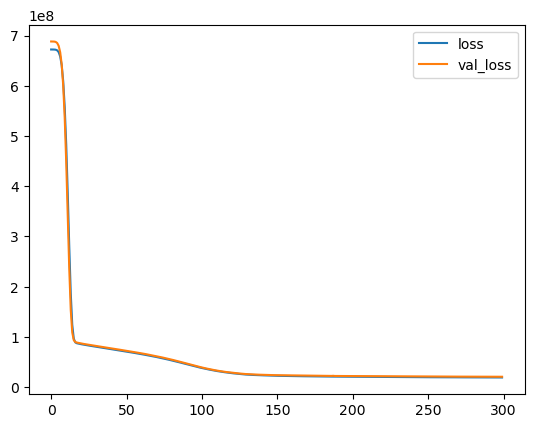

In [54]:
kayipVerisi.plot()

In [56]:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [57]:
tahminDizisi

array([[22227.303],
       [23403.014],
       [24937.342],
       ...,
       [26254.346],
       [12910.249],
       [24741.457]], dtype=float32)

In [58]:
mean_absolute_error(y_test,tahminDizisi)

3187.814184050614

In [59]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


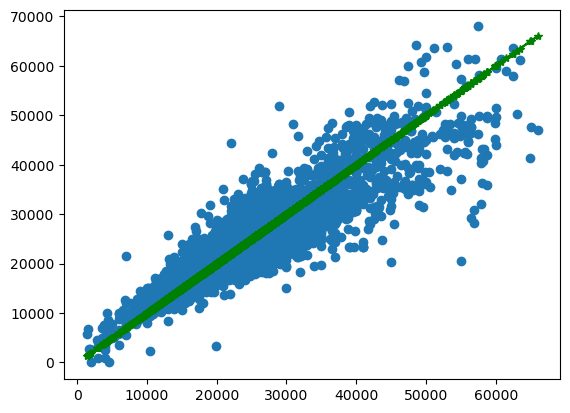

In [61]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [62]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [64]:
yeniAraba = dataFrame.drop("price",axis=1).iloc[2]

In [65]:
yeniAraba

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [67]:
yeniAraba = scaler.transform(yeniAraba.values.reshape(-1,5))

In [68]:
model.predict(yeniAraba)

1/1 [==============================] - 0s 28ms/step


array([[62112.52]], dtype=float32)